In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MaxAbsScaler
import geopandas as gpd

### so that you dont have warnings prompt
from warnings import filterwarnings
filterwarnings('ignore')


In [10]:
df=pd.read_csv(r"C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\2019_FINAL_DATA.csv")
shp= gpd.read_file(r"C:\Users\Praujjawal\Downloads\Shape Files\India States\Indian_states.shx")

In [11]:
df

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,...,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,Andhra Pradesh,24619.0,5.5,27.3,20.5,7984.0,5.3,8.8,6.7,15303.0,...,1723.0,94.0,3352.0,572.0,703.0,629.0,213.0,698.0,2636.0,711.0
1,Arunachal Pradesh,309.0,0.1,22.8,13.4,127.0,0.1,9.4,5.5,63.0,...,8.0,0.0,26.0,6.0,27.0,9.0,4.0,47.0,25.0,18.0
2,Assam,7473.0,1.7,22.3,19.0,3208.0,2.1,9.6,8.1,7037.0,...,718.0,106.0,1031.0,127.0,528.0,241.0,153.0,304.0,440.0,253.0
3,Bihar,7206.0,1.6,6.7,8.4,7205.0,4.8,6.7,8.4,8373.0,...,1259.0,419.0,3135.0,440.0,932.0,243.0,131.0,646.0,525.0,76.0
4,Chhattisgarh,13090.0,2.9,48.9,20.5,5003.0,3.3,18.7,7.8,8395.0,...,578.0,173.0,2894.0,51.0,413.0,274.0,71.0,549.0,2618.0,701.0
5,Goa,1448.0,0.3,68.4,10.3,297.0,0.2,14.0,2.1,3337.0,...,50.0,2.0,186.0,1.0,16.0,4.0,8.0,30.0,147.0,24.0
6,Gujarat,16258.0,3.6,25.1,6.5,7390.0,4.9,11.4,2.9,11936.0,...,1291.0,84.0,2755.0,375.0,1381.0,817.0,200.0,487.0,2013.0,1447.0
7,Haryana,9362.0,2.1,32.7,10.9,5057.0,3.3,17.7,5.9,3922.0,...,1673.0,103.0,1614.0,99.0,589.0,320.0,135.0,524.0,554.0,478.0
8,Himachal Pradesh,4904.0,1.1,67.6,30.0,1146.0,0.8,15.8,7.0,1807.0,...,192.0,5.0,288.0,2.0,469.0,59.0,81.0,50.0,239.0,634.0
9,Jammu & Kashmir,7532.0,1.7,58.9,40.6,996.0,0.7,7.8,5.4,4863.0,...,88.0,7.0,171.0,14.0,246.0,138.0,108.0,224.0,19.0,35.0


In [12]:
#Dropping the columns "share of states/UTs" as it has corr=1 with respectively previous columns

dropped= df.columns[[2,6]]
df= df.iloc[:, ~df.columns.isin(dropped)]

In [13]:
sd= df.select_dtypes(exclude=['object'])
sd.head()

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,24619.0,27.3,20.5,7984.0,8.8,6.7,15303.0,1262.0,2576.0,1723.0,94.0,3352.0,572.0,703.0,629.0,213.0,698.0,2636.0,711.0
1,309.0,22.8,13.4,127.0,9.4,5.5,63.0,50.0,52.0,8.0,0.0,26.0,6.0,27.0,9.0,4.0,47.0,25.0,18.0
2,7473.0,22.3,19.0,3208.0,9.6,8.1,7037.0,640.0,369.0,718.0,106.0,1031.0,127.0,528.0,241.0,153.0,304.0,440.0,253.0
3,7206.0,6.7,8.4,7205.0,6.7,8.4,8373.0,823.0,130.0,1259.0,419.0,3135.0,440.0,932.0,243.0,131.0,646.0,525.0,76.0
4,13090.0,48.9,20.5,5003.0,18.7,7.8,8395.0,857.0,1763.0,578.0,173.0,2894.0,51.0,413.0,274.0,71.0,549.0,2618.0,701.0


In [14]:
col= sd.columns

In [15]:
sclr= MaxAbsScaler()
sd= sclr.fit_transform(sd)


In [16]:
states= df.iloc[:,0]

In [17]:
dff =pd.DataFrame(sd,columns=col)

In [18]:
DF = pd.merge(states,dff, left_index=True, right_index=True)

CUSTOM OWA RULES

If a state has 10 or more indicators (considering total 19 indicators) with poor performance then it has an average index score less than 0.25 The indicators having bad values(<25%ile) will be considered as having indicator value = 0 The indiactors having values between (25%ile and 75th %ile) have indicactor value = 0.5

If a state has 9 indicators (considering total 19 indicators) with good performance and 1 with average performance then it has lower medium index score(0.25- 0.5). The indicators having good values(>75%ile) will be considered as having indicator value = 1

Equations= 

(9/19)^A <= 0.25

=>   a>= 1.85

0.25 <= 0.5(10/19)^A + 0.5(9/19)^A <= 0.5

=>   1<= a <= 2.00

<b>SOLVE</b> <br> Leaves us with A in range[1.85 - 2.00]

So, we take A= 1.9 for OWA 

So, OWA Weights
W1= (1/9)^1.9

W2= (2/19)^1.9- (1/19)^1.9

W3= (3/19)^1.9 - (2/19)^1.9

.........

W19= 1 - (18/19)^1.9,

So, <br>
W1= 0.0037185 <br>
W2= 0.0101594 <br>
W3= 0.0161067 <br>
W4= 0.0218097 <br>
W5= 0.0273484 <br>
W6= 0.0327638 <br>
W7= 0.0380807 <br>
W8= 0.043316 <br>
W9= 0.0484815 <br>
W10= 0.0535864 <br>
W11= 0.0586378 <br>
W12= 0.0636411 <br>
W13= 0.068601 <br>
W14= 0.0735213 <br>
W15= 0.0784053 <br>
W16= 0.0832556 <br>
W17= 0.0880747 <br>
W18= 0.0928647 <br>
W19= 0.0976274


In [19]:
OWA_weights= np.array([[0.0976274], [0.0928647], [0.0880747], [0.0832556], [0.0784053], [0.0735213], [0.068601], [0.0636411],
                       [0.0586378], [0.0535864], [0.0484815], [0.043316], [0.0380807], [0.0327638], [0.0273484], [0.0218097],
                       [0.0161067], [0.0101594], [0.0037185]]) 

In [20]:
df2019_OW_TPS= DF.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].apply(lambda x: sorted(x.values), axis=1)

In [21]:
OW_matrix=np.zeros((36, 19))

In [24]:
for i in range(len(df2019_OW_TPS)):
 
    for j in range(len(OW_matrix[0])):
 
        OW_matrix[i][j] = df2019_OW_TPS[i][j] * OWA_weights[j][0]

In [25]:
OW_df= pd.DataFrame(OW_matrix)

In [26]:
n = len(OW_df.columns)
m = len(OW_df.index)

a_pos = np.zeros(n)
a_neg = np.zeros(n)
for j in range(n):
    column = OW_df.iloc[:,j]
    max_val = np.max(column)
    min_val = np.min(column)
    
    # Since all the attributes are to be minimized, so the value with minimum cost is considererd for PIS.
    a_pos[j] = min_val
    a_neg[j] = max_val

pd.DataFrame(data=[a_pos, a_neg], index=["$A^*$", "$A^-$"], columns=dff.columns)

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
$A^*$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.248537e-07,3.760875e-07,0.000096,0.000050
$A^-$,0.011175,0.028198,0.037955,0.041837,0.041509,0.044419,0.046407,0.044587,0.058638,0.053586,0.048481,0.043316,0.038081,0.032764,0.027348,2.180970e-02,1.610670e-02,0.010159,0.003719


In [27]:
sp = np.zeros(m)
sn = np.zeros(m)
cs = np.zeros(m)

for i in range(m):
    diff_pos = OW_df.iloc[i,:] - a_pos
    diff_neg = OW_df.iloc[i,:] - a_neg
    sp[i] = np.sqrt(diff_pos @ diff_pos)
    sn[i] = np.sqrt(diff_neg @ diff_neg)
    cs[i] = sn[i] / (sp[i] + sn[i])

OW_TPS_Score= pd.DataFrame(data=zip(states,sp, sn, cs), columns=["States/UTs","$S^*$", "$S^-$", "OW_TPS_Score"])

In [28]:
OW_TPS_Score

,States/UTs,$S^*$,$S^-$,OW_TPS_Score
0,Andhra Pradesh,0.059053,0.105026,0.640092
1,Arunachal Pradesh,0.008299,0.161047,0.950992
2,Assam,0.025264,0.139265,0.846446
3,Bihar,0.033941,0.131414,0.794739
4,Chhattisgarh,0.039324,0.125988,0.762125
5,Goa,0.008910,0.159837,0.947197
6,Gujarat,0.048958,0.114945,0.701301
7,Haryana,0.028604,0.136679,0.826940
8,Himachal Pradesh,0.020391,0.151661,0.881485
9,Jammu & Kashmir,0.015857,0.154083,0.906689


In [29]:
# OW_TPS_Score.to_csv(r'C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\OW_Topsis_Score.csv',index=False)

In [30]:
OW_TPS_Score.loc[OW_TPS_Score["States/UTs"]=="Dadra & Nagar Haveli","States/UTs"]="Dadara & Nagar Havelli"
OW_TPS_Score.loc[OW_TPS_Score["States/UTs"]=="Arunachal Pradesh","States/UTs"]="Arunanchal Pradesh"
OW_TPS_Score.loc[OW_TPS_Score["States/UTs"]=="Andaman & Nicobar Islands","States/UTs"]="Andaman & Nicobar Island"
OW_TPS_Score.loc[OW_TPS_Score["States/UTs"]=="Delhi","States/UTs"]="NCT of Delhi"

In [31]:
merged_OW_TPS = shp.set_index('st_nm').join(OW_TPS_Score.set_index('States/UTs'))

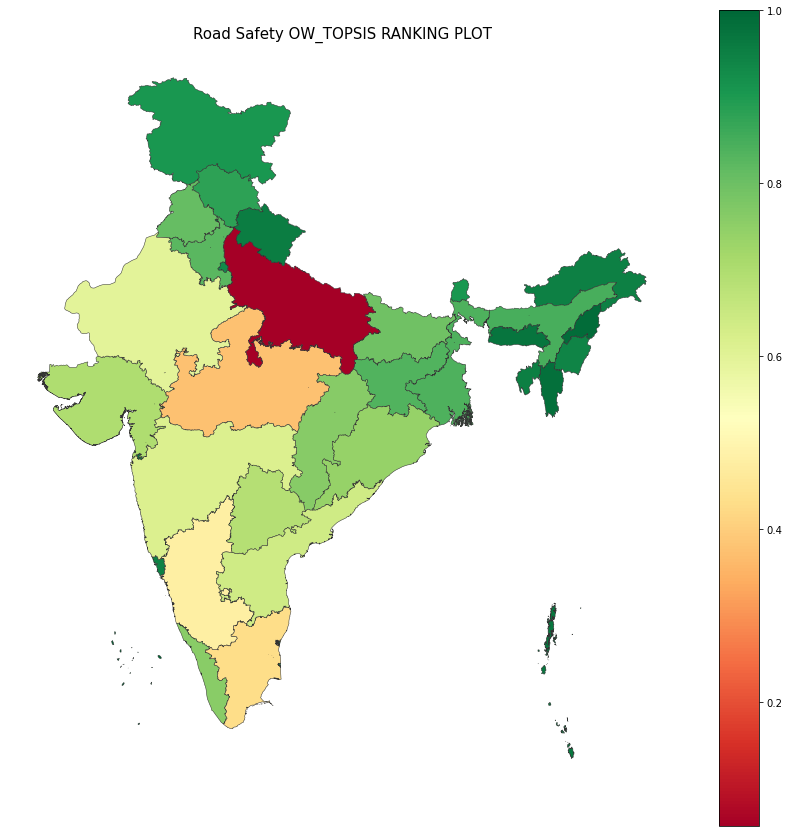

In [32]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Road Safety OW_TOPSIS RANKING PLOT',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged_OW_TPS.plot(column='OW_TPS_Score', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
plt.savefig(r"C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\OW_TOPSIS_RANKING_PLOT.png", facecolor="w")